In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from imp import reload
import gbeflow

In [2]:
df = gbeflow.tidy_vector_data('original')

In [8]:
# Create a subset of df for testing that is more manageable in size
test = df[df['frame'] < 3]

In [3]:
df.head()

,position ID,x,y,frame,vx,vy
0,0,11,11,0,0.0,0.0
1,1,11,16,0,0.0,0.0
2,2,11,21,0,0.0,0.0
3,3,11,26,0,0.0,0.0
4,4,11,31,0,0.0,0.0


# Goal
Convert data into an array based format with the following arrays: `vx`, `vy`, `xx`, `yy`

In [3]:
X = df.x.unique()
X

array([  11,   16,   21,   26,   31,   36,   41,   46,   51,   56,   61,
         66,   71,   76,   81,   86,   91,   96,  101,  106,  111,  116,
        121,  126,  131,  136,  141,  146,  151,  156,  161,  166,  171,
        176,  181,  186,  191,  196,  201,  206,  211,  216,  221,  226,
        231,  236,  241,  246,  251,  256,  261,  266,  271,  276,  281,
        286,  291,  296,  301,  306,  311,  316,  321,  326,  331,  336,
        341,  346,  351,  356,  361,  366,  371,  376,  381,  386,  391,
        396,  401,  406,  411,  416,  421,  426,  431,  436,  441,  446,
        451,  456,  461,  466,  471,  476,  481,  486,  491,  496,  501,
        506,  511,  516,  521,  526,  531,  536,  541,  546,  551,  556,
        561,  566,  571,  576,  581,  586,  591,  596,  601,  606,  611,
        616,  621,  626,  631,  636,  641,  646,  651,  656,  661,  666,
        671,  676,  681,  686,  691,  696,  701,  706,  711,  716,  721,
        726,  731,  736,  741,  746,  751,  756,  7

In [4]:
Y = df.y.unique()
Y

array([  11,   16,   21,   26,   31,   36,   41,   46,   51,   56,   61,
         66,   71,   76,   81,   86,   91,   96,  101,  106,  111,  116,
        121,  126,  131,  136,  141,  146,  151,  156,  161,  166,  171,
        176,  181,  186,  191,  196,  201,  206,  211,  216,  221,  226,
        231,  236,  241,  246,  251,  256,  261,  266,  271,  276,  281,
        286,  291,  296,  301,  306,  311,  316,  321,  326,  331,  336,
        341,  346,  351,  356,  361,  366,  371,  376,  381,  386,  391,
        396,  401,  406,  411,  416,  421,  426,  431,  436,  441,  446,
        451,  456,  461,  466,  471,  476,  481,  486,  491,  496,  501,
        506,  511,  516,  521,  526,  531,  536,  541,  546,  551,  556,
        561,  566,  571,  576,  581,  586,  591,  596,  601,  606,  611,
        616,  621,  626,  631,  636,  641,  646,  651,  656,  661,  666,
        671,  676,  681,  686,  691,  696,  701,  706,  711,  716,  721,
        726,  731,  736,  741,  746,  751,  756,  7

Use the unique values for x and y to construct a meshgrid array

In [5]:
xx,yy = np.meshgrid(X,Y)

Create template arrays to fill with vx/vy values. Start with np.nan values to make it easy to identify datapoints that may have been neglected.

In [9]:
vx = np.full(xx.shape,np.nan)
vy = np.full(yy.shape,np.nan)

In [11]:
xx,yy

(array([[  11,   16,   21, ..., 1001, 1006, 1011],
        [  11,   16,   21, ..., 1001, 1006, 1011],
        [  11,   16,   21, ..., 1001, 1006, 1011],
        ...,
        [  11,   16,   21, ..., 1001, 1006, 1011],
        [  11,   16,   21, ..., 1001, 1006, 1011],
        [  11,   16,   21, ..., 1001, 1006, 1011]]),
 array([[  11,   11,   11, ...,   11,   11,   11],
        [  16,   16,   16, ...,   16,   16,   16],
        [  21,   21,   21, ...,   21,   21,   21],
        ...,
        [1001, 1001, 1001, ..., 1001, 1001, 1001],
        [1006, 1006, 1006, ..., 1006, 1006, 1006],
        [1011, 1011, 1011, ..., 1011, 1011, 1011]]))

I'll try to use pandas to extract a single x value at a time. The selected subset will be sorted according to y in order to assign directly into the meshgrid arrays

In [13]:
xx[:,0], yy[:,0]

(array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]),
 array([  11,   16,   21,   26,   31,   36,   41,   46,   51,   56,   61,
          66,   71,   76

The time dimension also needs to be accounted for. The simplest approach would be to loop over each timeframe and then each x position.

In [17]:
grp = df.groupby('x')
for name,group in grp:
    print(name)
    print(group.sort_values('y'))
    break

11
         position ID   x     y frame         vx        vy
0                  0  11    11     0   0.000000  0.000000
4605714            0  11    11   114  -2.219400 -0.003948
4646115            0  11    11   115  -3.368700 -0.028273
4686516            0  11    11   116  -1.030400 -0.028453
4726917            0  11    11   117   0.050250  0.001802
4767318            0  11    11   118  -0.067750 -0.002089
404010             0  11    11    10   0.001661 -0.041194
4807719            0  11    11   119   0.381300  0.018044
444411             0  11    11    11   0.002107 -0.035473
4848120            0  11    11   120  -0.154560 -0.004907
4928922            0  11    11   122   3.349600  0.050205
363609             0  11    11     9   0.005738 -0.002963
4969323            0  11    11   123  -1.057700 -0.000408
5009724            0  11    11   124  -3.632500 -0.057338
5050125            0  11    11   125   0.436510  0.022214
5090526            0  11    11   126  -0.197310 -0.009228
5130927    

Meshgrid variables need to be reassigned to include a time dimension

# Start including the time dimension in the analysis

In [9]:
T = test.frame.unique()
T

array([0, 1, 2], dtype=object)

In [10]:
tt,xx,yy = np.meshgrid(T,X,Y,indexing='ij')

In [11]:
tt.shape

(3, 201, 201)

Indexing should behave like `[t,y,x]`

Create new vx and vy arrays with new 3d dimensions.

In [12]:
vx = np.full(tt.shape,np.nan)
vy = np.full(tt.shape,np.nan)

It's unclear what the speed difference might be between looping over a list of values then subsetting using boolean indexing vs groupby. I'm going to try the first method, but may return to the second later for improvements.

# Try manual loop with boolean indexing to cast into numpy array

In [53]:
%%timeit

# Loop over each frame
for i,t in enumerate(T):
    frame = test.loc[test.frame == t]
#     print(frame.values.shape)
    
    # Loop over each x value
    for j,x in enumerate(X):
        frame_x = frame.loc[frame.x == x].sort_values('y')
#         print(frame_x.values.shape)
        
        # Assign sorted values in frame_x to meshgrid arrays
        vx[i,j,:] = frame_x.vx.values
        vy[i,j,:] = frame_x.vy.values

660 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


```
CPU times: user 666 ms, sys: 3.98 ms, total: 670 ms  
Wall time: 670 ms
```

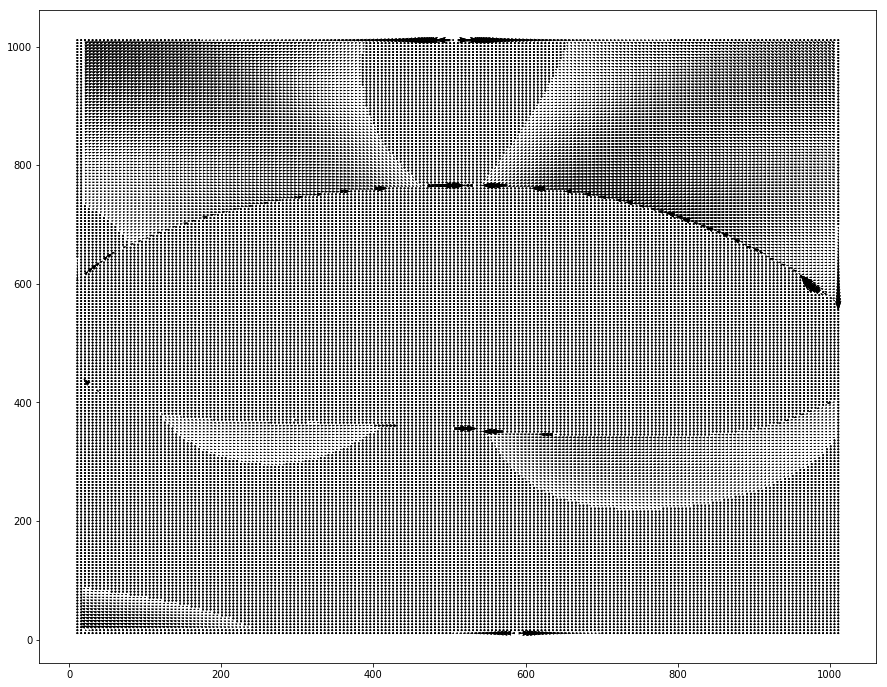

In [21]:
fig,ax = plt.subplots(figsize=(15,12))
plt.quiver(xx,yy,vx[2,:],vy[2,:])

# Hierarchical indexing approach

From [StackOverflow](https://stackoverflow.com/questions/35047882/transform-pandas-dataframe-with-n-level-hierarchical-index-into-n-d-numpy-array)
```python
# create an empty array of NaN of the right dimensions
shape = map(len, frame.index.levels)
arr = np.full(shape, np.nan)

# fill it using Numpy's advanced indexing
arr[frame.index.labels] = frame.values.flat
```

Dataframe needs to have a hierarchical index that defines the index position in the 3D array
```python
       value
0 0 0      0
    1      1
  1 0      2
    1      3
1 0 0      4
  1 0      6
    1      7
```

To create an appropriate hierarchical index for the vector data, x and y positions will need to be mapped onto an index value. The time data should be ok on its own as an index.

In [36]:
T

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165],
      dtype=object)

In [25]:
%%time
dfmi = test.set_index(['frame','x','y'])
dfmi.head()

CPU times: user 104 ms, sys: 3.52 ms, total: 108 ms
Wall time: 27.1 ms


In [46]:
dfmi.head()

position ID   vx   vy
frame x  y                        
0     11 11            0  0.0  0.0
         16            1  0.0  0.0
         21            2  0.0  0.0
         26            3  0.0  0.0
         31            4  0.0  0.0

In [51]:
arrvx = dfmi['vx'].values.reshape((3,201,201))
arrvy = dfmi['vy'].values.reshape((3,201,201))

In [54]:
%%timeit
dfmi = test.set_index(['frame','x','y'])
arrvx = dfmi['vx'].values.reshape((3,201,201))
arrvy = dfmi['vy'].values.reshape((3,201,201))

15.1 ms ± 258 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


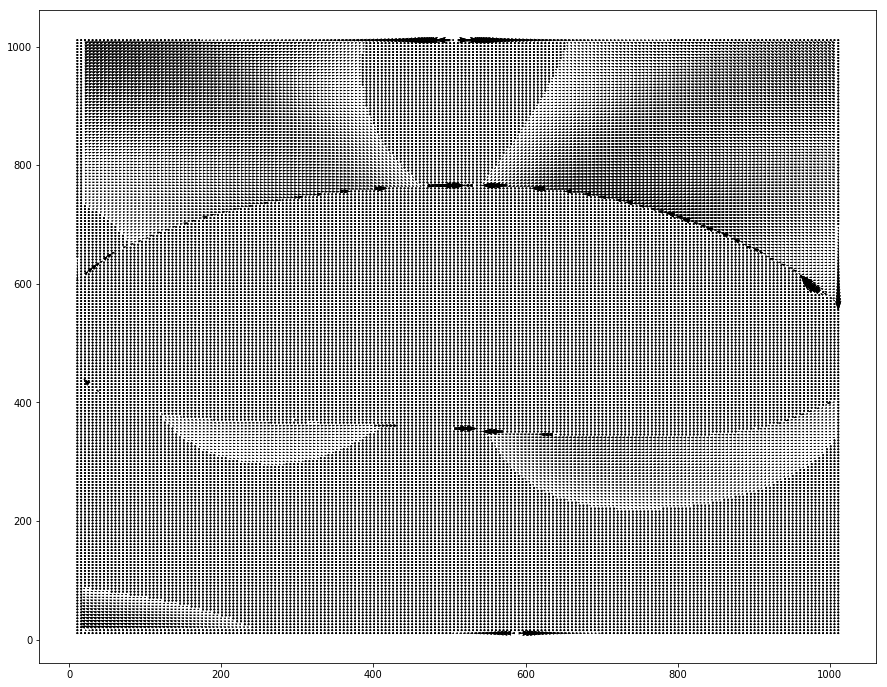

In [52]:
fig,ax = plt.subplots(figsize=(15,12))
plt.quiver(xx,yy,arrvx[2,:],arrvy[2,:])

# Comparison of methods

**Manual Loop**  
`660 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)`  
**Hierarchical Index**  
`15.1 ms ± 258 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)`  

It looks like the hierarchical index performs much better than the manual loop, which doesn't seem like a suprising outcome. Let's try running the hierarchical approach on the complete dataset.

# Full dataset test

In [59]:
T = df.frame.unique()
T.shape

(166,)

In [65]:
tt,xx,yy = np.meshgrid(T,X,Y,indexing='ij')

In [61]:
%%time
dfmi = df.set_index(['frame','x','y'])
vx = dfmi['vx'].values.reshape((T.shape[0],201,201))
vy = dfmi['vy'].values.reshape((T.shape[0],201,201))

CPU times: user 1.98 s, sys: 442 ms, total: 2.42 s
Wall time: 1.17 s


In [68]:
df.head()

,position ID,x,y,frame,vx,vy
0,0,11,11,0,0.0,0.0
1,1,11,16,0,0.0,0.0
2,2,11,21,0,0.0,0.0
3,3,11,26,0,0.0,0.0
4,4,11,31,0,0.0,0.0


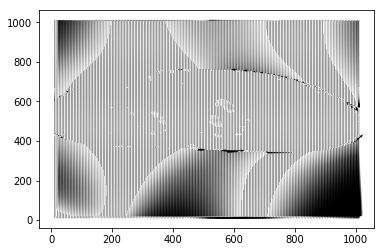

In [67]:
fig,ax = plt.subplots()
plt.quiver(xx[50],yy[50],vx[50],vy[50])

In [66]:
xx.shape

(166, 201, 201)

# Test `gbeflow` function

In [69]:
reload(gbeflow)

<module 'gbeflow' from '/Users/morganschwartz/Code/germband-extension/gbeflow/__init__.py'>

In [71]:
%%time
tt,xx,yy,vx,vy = gbeflow.reshape_vector_data(df)

CPU times: user 2.82 s, sys: 579 ms, total: 3.4 s
Wall time: 2.12 s
